## Some stuff we need to import first

Note: This document roughly follows the process of implementing a neural network from scratch described in [this paper](https://epubs.siam.org/doi/epdf/10.1137/18M1165748), up until Backpropagation

In [1]:
import math
import numpy.linalg as linalg
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import random

## Basic Idea

In order to use out-of-the-box optimization methods, we need to represent every changable parameter in one vector. For now, we implement the simple three layer network described in the paper, involving 23 parameters. 

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Helper function for turning parts of our vector into our weight matricies.
def make_matrix(cols, rows, data):
    acc = []

    i = 0
    for row in range(0, rows):
        acc_row = []
        for col in range(0, cols):
            acc_row.append(data[i])
            i += 1
        acc.append(acc_row)
    
    return np.matrix(acc)

# The function that applies our parameter vector (which we want to maximize) to an input x
def F(params, x):
    i = 0
    W2 = make_matrix(2, 2, params[i:i+4])
    i += 4
    W3 = make_matrix(2, 3, params[i:i+6])
    i += 6
    W4 = make_matrix(3, 2, params[i:i+6])
    i += 6
    b2 = (params[i:i+2])[:, np.newaxis]
    i += 2
    b3 = (params[i:i+3])[:, np.newaxis]
    i += 3
    b4 = (params[i:i+2])[:, np.newaxis]

    ret = sigmoid(W4 * sigmoid(W3 * sigmoid(W2 * x + b2) + b3) + b4)
    return ret

# data: pairs (x, y, True|False)
# Computes the cost for some given data and parameters (difference between actual and expected)
def CostForData(data, params):
    
    total = 0
    residuals = []
    for pair in data:
        dataInput = np.array(pair[0:2])
        dataInput = dataInput[:, np.newaxis]
        dataExpected = pair[2]
        dataExpectedVector = [[1], [0]] if dataExpected else [[0], [1]]
        
        result = F(params, dataInput)

        total += 0.5 * linalg.norm(dataExpectedVector - result) ** 2
        residuals.append(linalg.norm(dataExpectedVector - result))

    average = total / len(data)
    return residuals


Next, we load some data points and plot them. We want our system to create regions that section off the two colors of points.

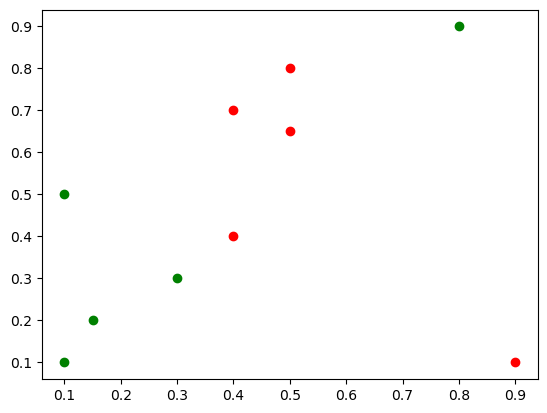

In [3]:
data = [
    (0.1, 0.1, True), 
    (0.1, 0.5, True), 
    (0.3, 0.3, True), 
    (0.15, 0.2, True), 
    (0.8, 0.9, True), 
    (0.4, 0.4, False), 
    (0.5, 0.65, False), 
    (0.5, 0.8, False),
    (0.4, 0.7, False),
    (0.9, 0.1, False)
]

def Cost(params):
    return CostForData(data, params)

yesData = list(filter(lambda p: p[2], data))
noData = list(filter(lambda p: not p[2], data))

plt.scatter(list(map(lambda p: p[0], yesData)), list(map(lambda p: p[1], yesData)), c='g')
plt.scatter(list(map(lambda p: p[0], noData)), list(map(lambda p: p[1], noData)), c='r')

Because we haven't implemented backpropogation, we'll just run the scipy no-knowledge least squares optimization method

In [4]:
# Initialize all parameters at random
initial = []
for i in range(0, 23):
    initial.append((0.5 - random.random())*1)
print(initial)

# Compute the optimal using the scipy least squares
optimal = scipy.optimize.least_squares(Cost, np.array(initial, dtype=float))
print(optimal)

[-0.06751700136046157, 0.3890045161608945, 0.303545366234687, -0.07587433434012536, -0.1317133149010593, -0.07132508428848694, -0.1337342998914206, 0.007997211045373431, 0.07474134458553794, -0.37826170842586315, -0.12442479029645026, 0.23169498296548519, 0.32697074961369577, 0.3936207972665854, 0.41887110074695966, 0.0034108917317541287, 0.11126525990682268, -0.18206121738974956, 0.24577138817625988, 0.06629480254279396, 0.04769061116362361, -0.16032393353588648, -0.44297342304049014]
     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [ 4.502e-05  4.736e-05  7.340e-05  4.488e-05  1.180e-04
                8.377e-05  5.891e-05  7.352e-05  5.753e-05  6.164e-05]
           x: [-8.129e+00 -5.264e+00 ...  6.405e+00 -6.751e+00]
        cost: 2.4303142067441337e-08
         jac: [[-1.234e-10 -1.236e-10 ... -1.658e-05  2.844e-05]
               [-5.982e-09 -3.081e-08 ... -1.729e-05  3.007e-05]
               ...
               [-4.883e-07

Then, just graph the fit!

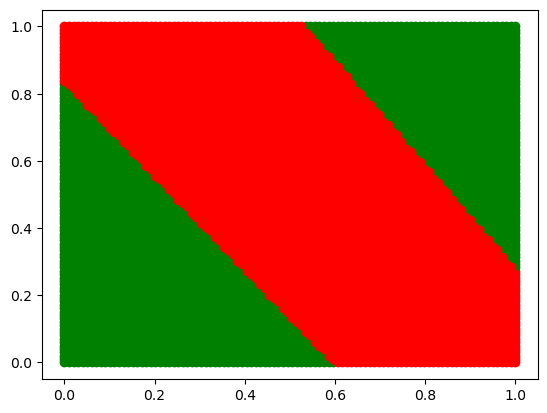

In [5]:
optimal_x = optimal.x

domain = []
for (i, x) in enumerate(np.linspace(0, 1, 100)):
    for (j, y) in enumerate(np.linspace(0, 1, 100)):
        domain.append([[x], [y]])

yesDomain = []
noDomain = []
for d in domain:
    result = F(optimal_x, d)
    if result[0] < 0.5:
        noDomain.append(d)
    else:
        yesDomain.append(d)

plt.scatter(list(map(lambda p: p[0], yesDomain)), list(map(lambda p: p[1], yesDomain)), c='g')
plt.scatter(list(map(lambda p: p[0], noDomain)), list(map(lambda p: p[1], noDomain)), c='r')

## Next up: using Backpropogation instead of least squares!